In [1]:
%matplotlib inline

from IPython import display
import seaborn
import sympy

import weno_computations

seaborn.set_palette('husl')

On an evenly spaced grid $x_j = j \Delta x$, $u(x_{j}) = u_{j}$.

**GOAL**: Approximate $u\left(x_{j + \frac{1}{2}}\right)$ (third and fifth order, using $x_{j-2}, x_{j-1}, x_j, x_{j+1}, x_{j+2}$).

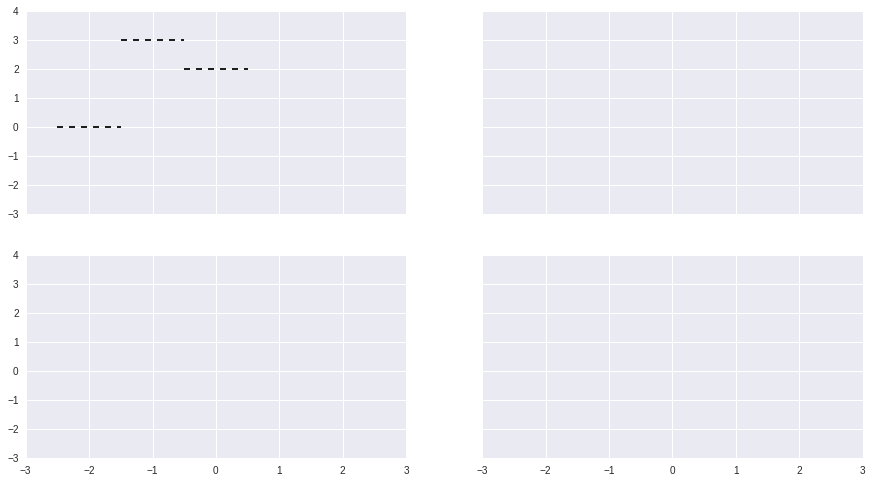

In [2]:
weno_computations.make_intro_plots(0)

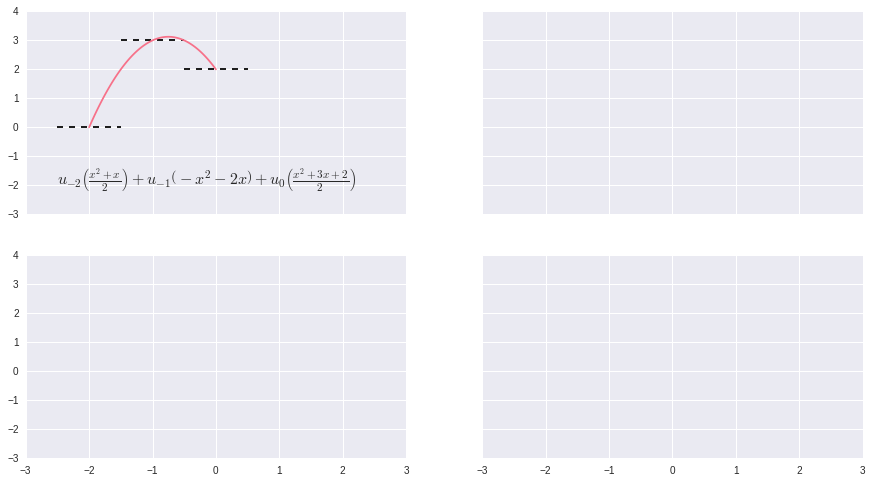

In [3]:
weno_computations.make_intro_plots(1)

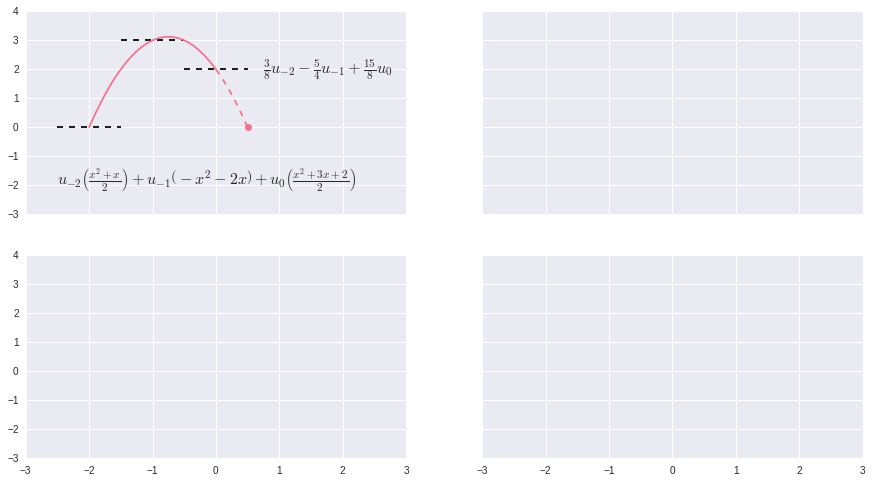

In [4]:
weno_computations.make_intro_plots(2)

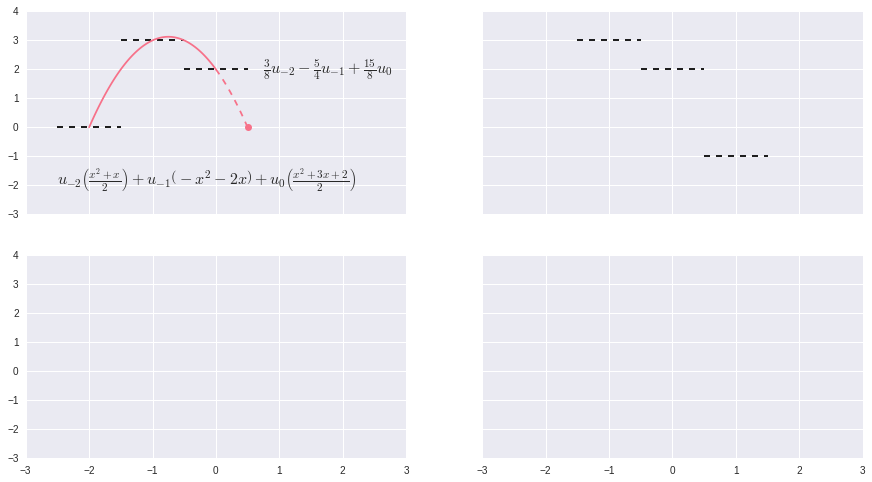

In [5]:
weno_computations.make_intro_plots(3)

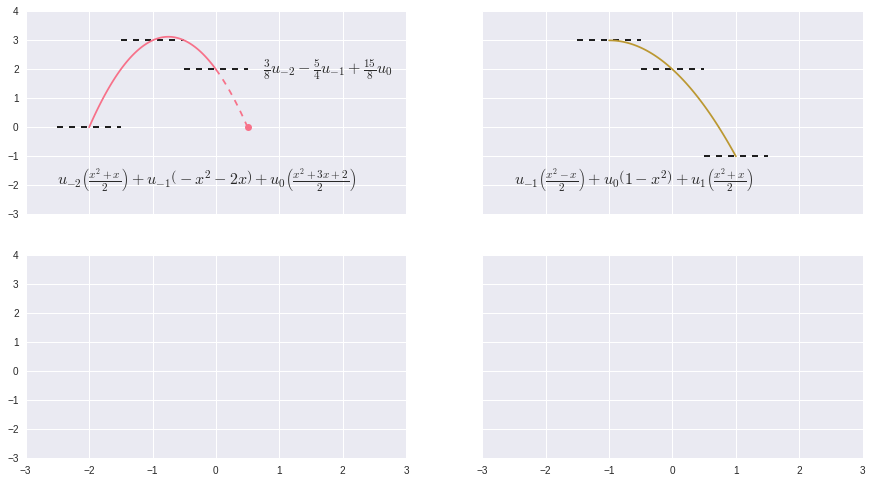

In [6]:
weno_computations.make_intro_plots(4)

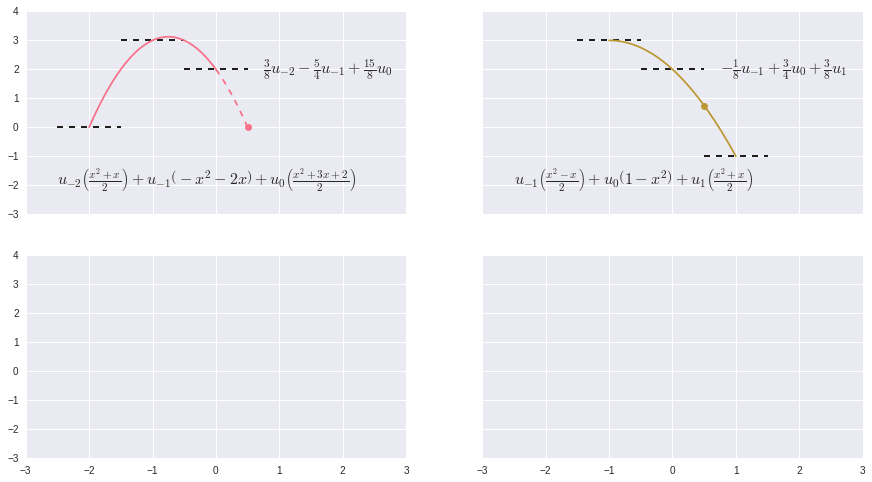

In [7]:
weno_computations.make_intro_plots(5)

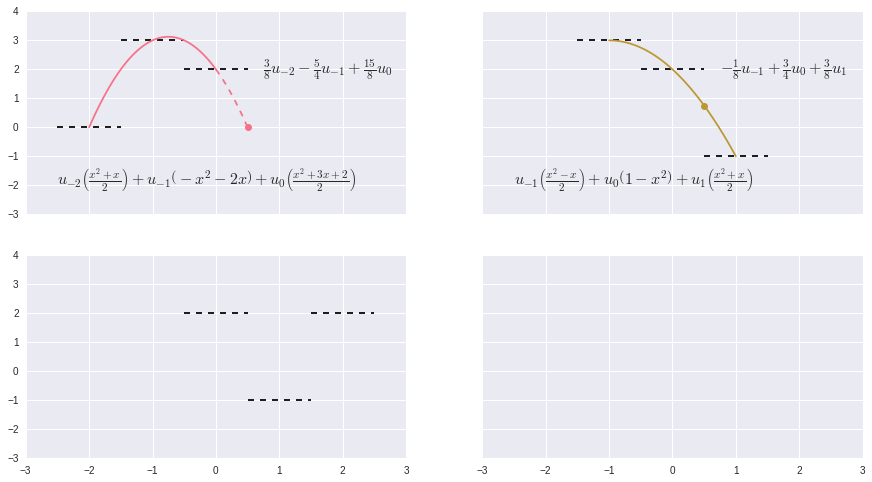

In [8]:
weno_computations.make_intro_plots(6)

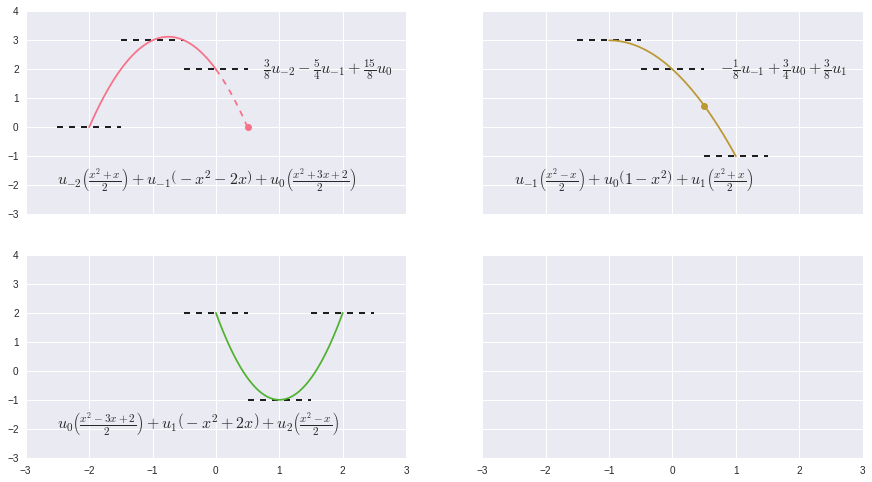

In [9]:
weno_computations.make_intro_plots(7)

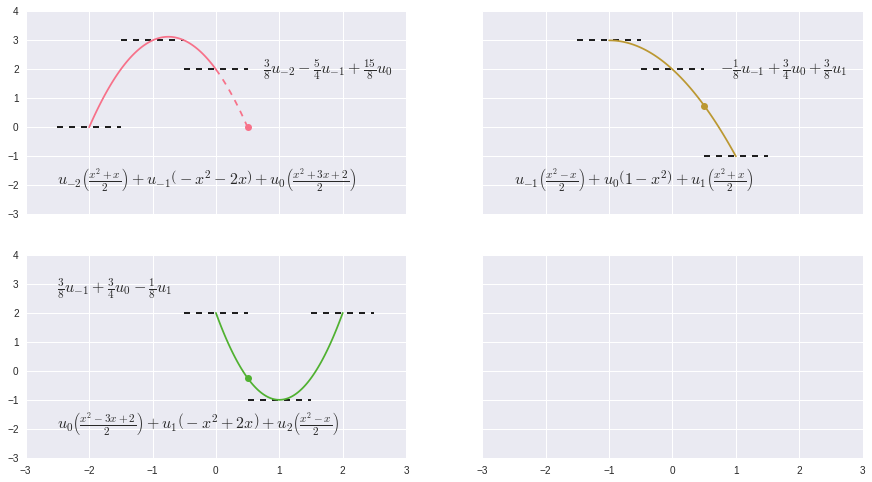

In [10]:
weno_computations.make_intro_plots(8)

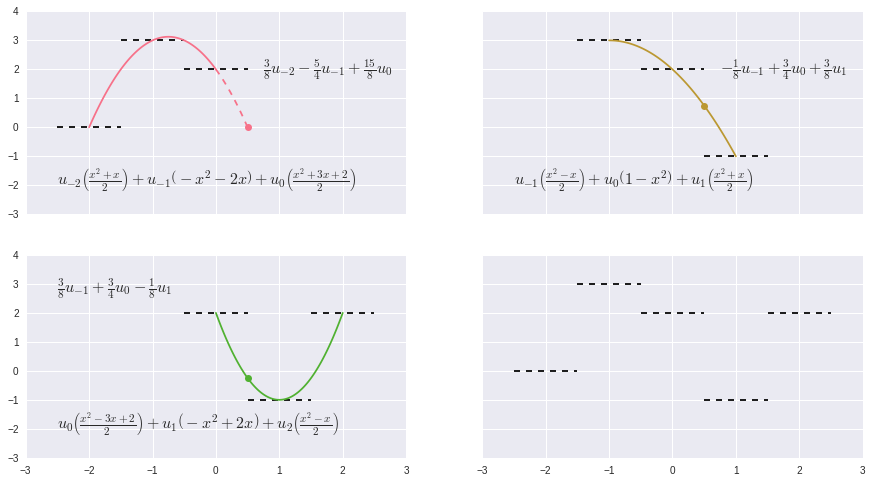

In [11]:
weno_computations.make_intro_plots(9)

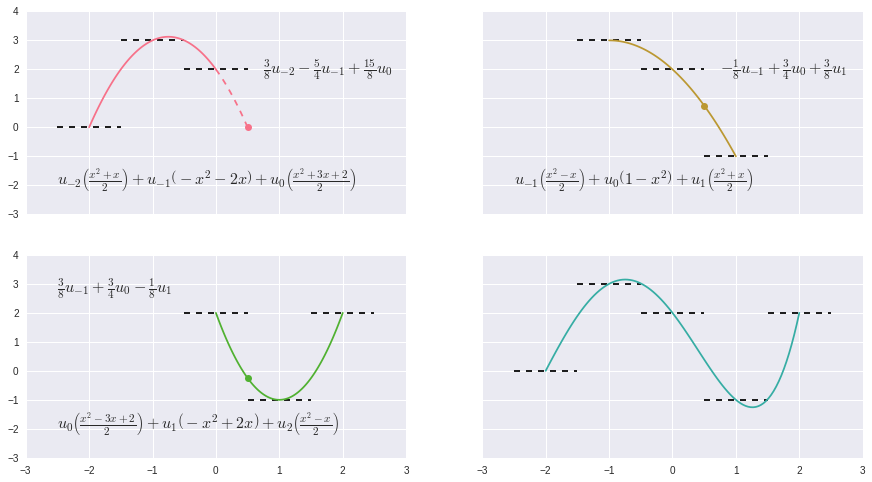

In [12]:
weno_computations.make_intro_plots(10)

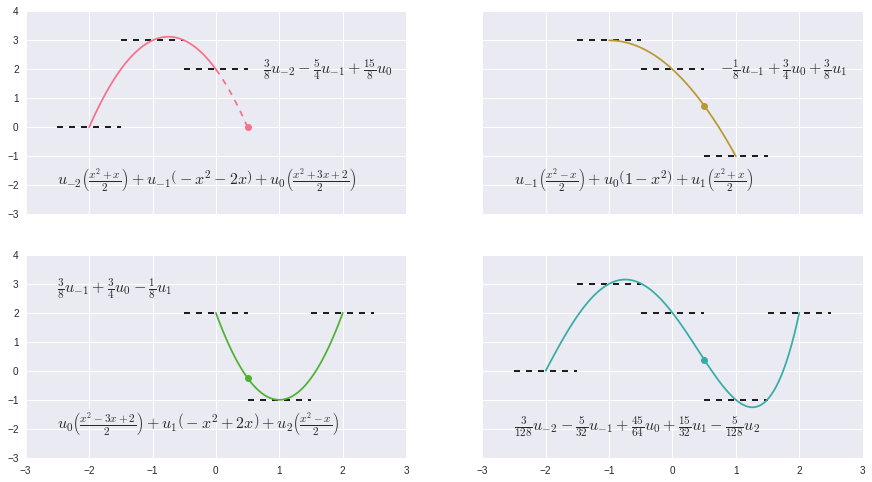

In [13]:
weno_computations.make_intro_plots(11)

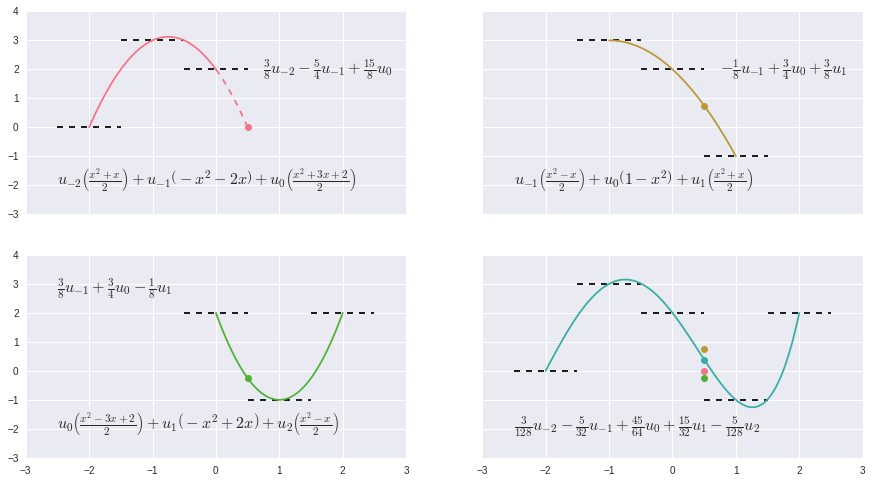

In [14]:
weno_computations.make_intro_plots(12)

In [15]:
(approx_minus2, approx_minus1, 
 approx_zero, approx_all) = weno_computations.interp_simple_stencils()

In [16]:
display.display(display.Math(approx_minus2))
display.display(display.Math(approx_minus1))
display.display(display.Math(approx_zero))
display.display(display.Math(approx_all))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The TVD-diminishing RK scheme

$$\begin{array}{c | c c c}
  0 &     &     &   \\
  1 &   1 &     &   \\
1/2 & 1/4 & 1/4 &   \\
\hline
    & 1/6 & 1/6 & 2/3
\end{array}$$

when applied to a linear problem $u' = \lambda u$ gives
$$\begin{align*}
k_1 &= \lambda u \\
k_2 &= \lambda \left(u + \Delta t k_1\right) = \left(\lambda + \lambda^2 \Delta t\right) u \\
k_3 &= \lambda \left(u + \frac{\Delta t}{4} k_1 + \frac{\Delta t}{4} k_2\right) =
\left(\lambda + \frac{\lambda^2 \Delta t}{2} + \frac{\lambda^3 (\Delta t)^2}{4}\right)u \\
u^{\text{new}} &= u + \frac{\Delta t}{6}\left(k_1 + k_2 + 4 k_3\right) =
\left(1 + z + \frac{z}{2} + \frac{z^3}{6}\right)u
\end{align*}$$